
DATA SUMMARY
Dataset Modality        Model  Dice Score
    FCD    FLAIR From Scratch    0.144290
    FCD    FLAIR    MCL + MIM    0.164860
    FCD    FLAIR     CL + MIM    0.188813
    FCD    FLAIR          MCL    0.146930
    FCD    FLAIR           CL    0.110670
    FCD       T1 From Scratch    0.045786
    FCD       T1    MCL + MIM    0.151200
    FCD       T1     CL + MIM    0.170050
    FCD       T1          MCL    0.106120
    FCD       T1           CL    0.111820
  ISLES      DWI From Scratch    0.725040
  ISLES      DWI    MCL + MIM    0.742330
  ISLES      DWI     CL + MIM    0.755020
  ISLES      DWI          MCL    0.727760
  ISLES      DWI           CL    0.749960
  ISLES    FLAIR From Scratch    0.535820
  ISLES    FLAIR    MCL + MIM    0.535100
  ISLES    FLAIR     CL + MIM    0.566110
  ISLES    FLAIR          MCL    0.520770
  ISLES    FLAIR           CL    0.500260
  ISLES      ADC From Scratch    0.460880
  ISLES      ADC    MCL + MIM    0.472380
  ISLES      ADC    

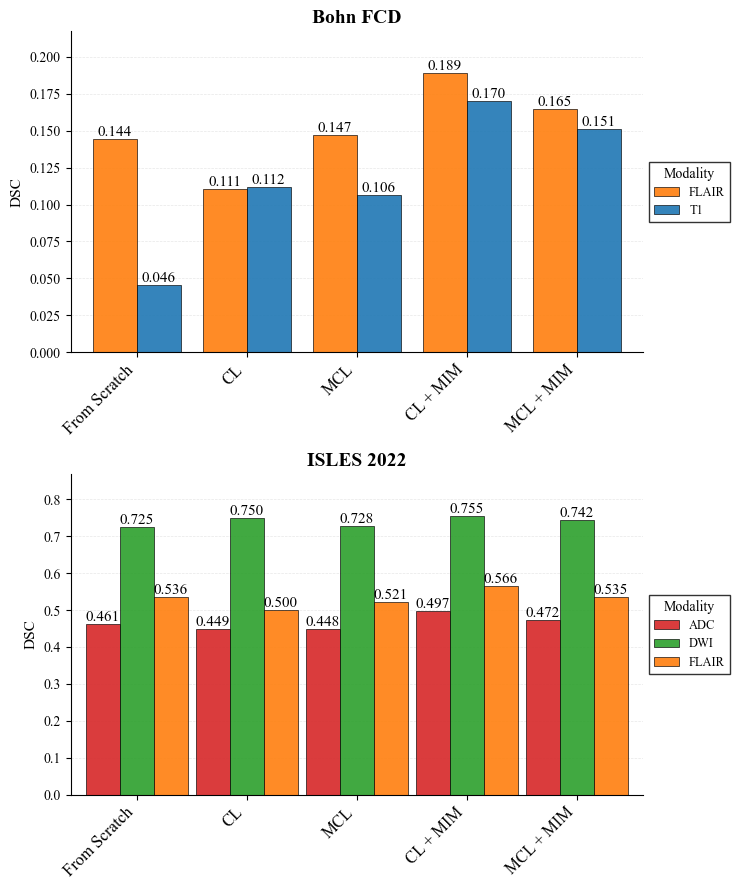

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 9,
    'legend.title_fontsize': 10,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'figure.figsize': (7, 4),
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 2,
    'lines.markersize': 7
})

dataset_display_names = {
    'FCD': 'Bohn FCD',
    'ISLES': 'ISLES 2022'
}

model_colors = {
    'From Scratch': '#1f77b4',  # blue
    'CL': '#ff7f0e',  # orange
    'MCL': '#2ca02c',  # green
    'CL + MIM': '#d62728',  # red
    'MCL + MIM': '#9467bd'  # purple
}

modality_colors = {'T1': '#1f77b4', 'FLAIR': '#ff7f0e', 'DWI': '#2ca02c', 'ADC': '#d62728'}
model_order = ['From Scratch', 'CL', 'MCL', 'CL + MIM', 'MCL + MIM']

# Results from both datasets
results = {
    # FCD Dataset
    "FCD_flair_fewshot-100%_from_scratch": 0.14429,
    "FCD_flair_fewshot-100%_combined_modality": 0.16486,
    "FCD_flair_fewshot-100%_combined_regular": 0.188813,
    "FCD_flair_fewshot-100%_contrastive_modality": 0.14693,
    "FCD_flair_fewshot-100%_contrastive_regular": 0.11067,
    
    "FCD_t1_fewshot-100%_from_scratch": 0.045786,
    "FCD_t1_fewshot-100%_combined_modality": 0.1512,
    "FCD_t1_fewshot-100%_combined_regular": 0.17005,
    "FCD_t1_fewshot-100%_contrastive_modality": 0.10612,
    "FCD_t1_fewshot-100%_contrastive_regular": 0.11182,
    
    # ISLES Dataset
    "ISLES_dwi_fewshot-100%_from_scratch": 0.72504,
    "ISLES_dwi_fewshot-100%_combined_modality": 0.74233,
    "ISLES_dwi_fewshot-100%_combined_regular": 0.75502,
    "ISLES_dwi_fewshot-100%_contrastive_modality": 0.72776,
    "ISLES_dwi_fewshot-100%_contrastive_regular": 0.74996,
    
    "ISLES_flair_fewshot-100%_from_scratch": 0.53582,
    "ISLES_flair_fewshot-100%_combined_modality": 0.5351,
    "ISLES_flair_fewshot-100%_combined_regular": 0.56611,
    "ISLES_flair_fewshot-100%_contrastive_modality": 0.52077,
    "ISLES_flair_fewshot-100%_contrastive_regular": 0.50026,
    "ISLES_adc_fewshot-100%_from_scratch": 0.46088,
    "ISLES_adc_fewshot-100%_combined_modality": 0.47238,
    "ISLES_adc_fewshot-100%_combined_regular": 0.49745,
    "ISLES_adc_fewshot-100%_contrastive_modality": 0.44796,
    "ISLES_adc_fewshot-100%_contrastive_regular": 0.44921,
}

# Parse results into structured data
data_rows = []
for key, dice_score in results.items():
    parts = key.split('_')
    dataset = parts[0]  # FCD or ISLES
    modality = parts[1].upper()  # T1, FLAIR, DWI
    model = '_'.join(parts[3:])  # model name
    
    # Format model name for display
    model_display = model.replace('_', ' ').title()
    
    # Map to preferred labels
    label_mapping = {
        'Contrastive Regular': 'CL',
        'Contrastive Modality': 'MCL',
        'Combined Regular': 'CL + MIM',
        'Combined Modality': 'MCL + MIM'
    }
    model_display = label_mapping.get(model_display, model_display)
    
    data_rows.append({
        'Dataset': dataset,
        'Modality': modality,
        'Model': model_display,
        'Dice Score': dice_score
    })

df = pd.DataFrame(data_rows)
print("\n" + "="*80)
print("DATA SUMMARY")
print("="*80)
print(df.to_string(index=False))
print("\n")

fig, axes = plt.subplots(2, 1, figsize=(7.5, 9), sharey=False)
datasets = ['FCD', 'ISLES']
for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    df_dataset = df[df['Dataset'] == dataset]
    
    # Get modalities for this dataset
    modalities = sorted(df_dataset['Modality'].unique())
    # Use the defined model order instead of sorting
    models = [m for m in model_order if m in df_dataset['Model'].unique()]
    
    x = np.arange(len(models))
    # Wider bars
    width = 0.40 if len(modalities) == 2 else 0.31 # Increased from 0.35/0.28
    
    # Plot bars for each modality
    for i, modality in enumerate(modalities):
        df_mod = df_dataset[df_dataset['Modality'] == modality]
        values = []
        for model in models:
            val = df_mod[df_mod['Model'] == model]['Dice Score'].values
            values.append(val[0] if len(val) > 0 else 0)
        
        offset = width * (i - (len(modalities)-1)/2)
        bars = ax.bar(x + offset, values, width, label=modality,
                      color=modality_colors.get(modality, '#666666'), 
                      alpha=0.9, edgecolor='black', linewidth=0.5)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            if height > 0.01:  # Only show if significant
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}',
                       ha='center', va='bottom', fontsize=11)
    
    #ax.set_xlabel('Model')
    ax.set_ylabel('DSC')
    # Use display name for dataset
    dataset_display = dataset_display_names.get(dataset, dataset)
    ax.set_title(f'{dataset_display}', fontweight='bold', fontsize=14)
    
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right', fontsize=12)
    
    # Add padding to x-axis limits for better spacing
    ax.set_xlim(-0.6, len(models) - 0.4)
    
    # Legend - placed outside the plot area on the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, 
              edgecolor='black', fancybox=False, shadow=False, title='Modality')
    
    # Grid
    ax.yaxis.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # Clean spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Set y-axis range with some padding
    max_val = df_dataset['Dice Score'].max()
    ax.set_ylim(0, max_val * 1.15)
plt.tight_layout()
plt.savefig('multi_dataset_comparison_vertical.png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
plt.savefig('multi_dataset_comparison_vertical.pdf', bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("✓ Saved: multi_dataset_comparison_vertical.png/pdf")
plt.show()


MCL (BEFORE deduplication):
  Shape: torch.Size([1159, 768])
  Patients: 177
  Modalities: ['dwi', 'flair', 'pd', 't1', 't2']

CL (BEFORE deduplication):
  Shape: torch.Size([1159, 768])
  Patients: 177
  Modalities: ['dwi', 'flair', 'pd', 't1', 't2']

MAE + MCL (BEFORE deduplication):
  Shape: torch.Size([1159, 768])
  Patients: 177
  Modalities: ['dwi', 'flair', 'pd', 't1', 't2']

MAE + CL (BEFORE deduplication):
  Shape: torch.Size([1159, 768])
  Patients: 177
  Modalities: ['dwi', 'flair', 'pd', 't1', 't2']

Computing patient t-SNE for MCL...
  Using 114 samples with perplexity=30
Computing patient t-SNE for CL...
  Using 114 samples with perplexity=30

Saved: /Users/P70090502/Documents/MRI_App/UMBRA/files/tsne_patient_clustering_mcl_vs_cl_with_modalities.pdf


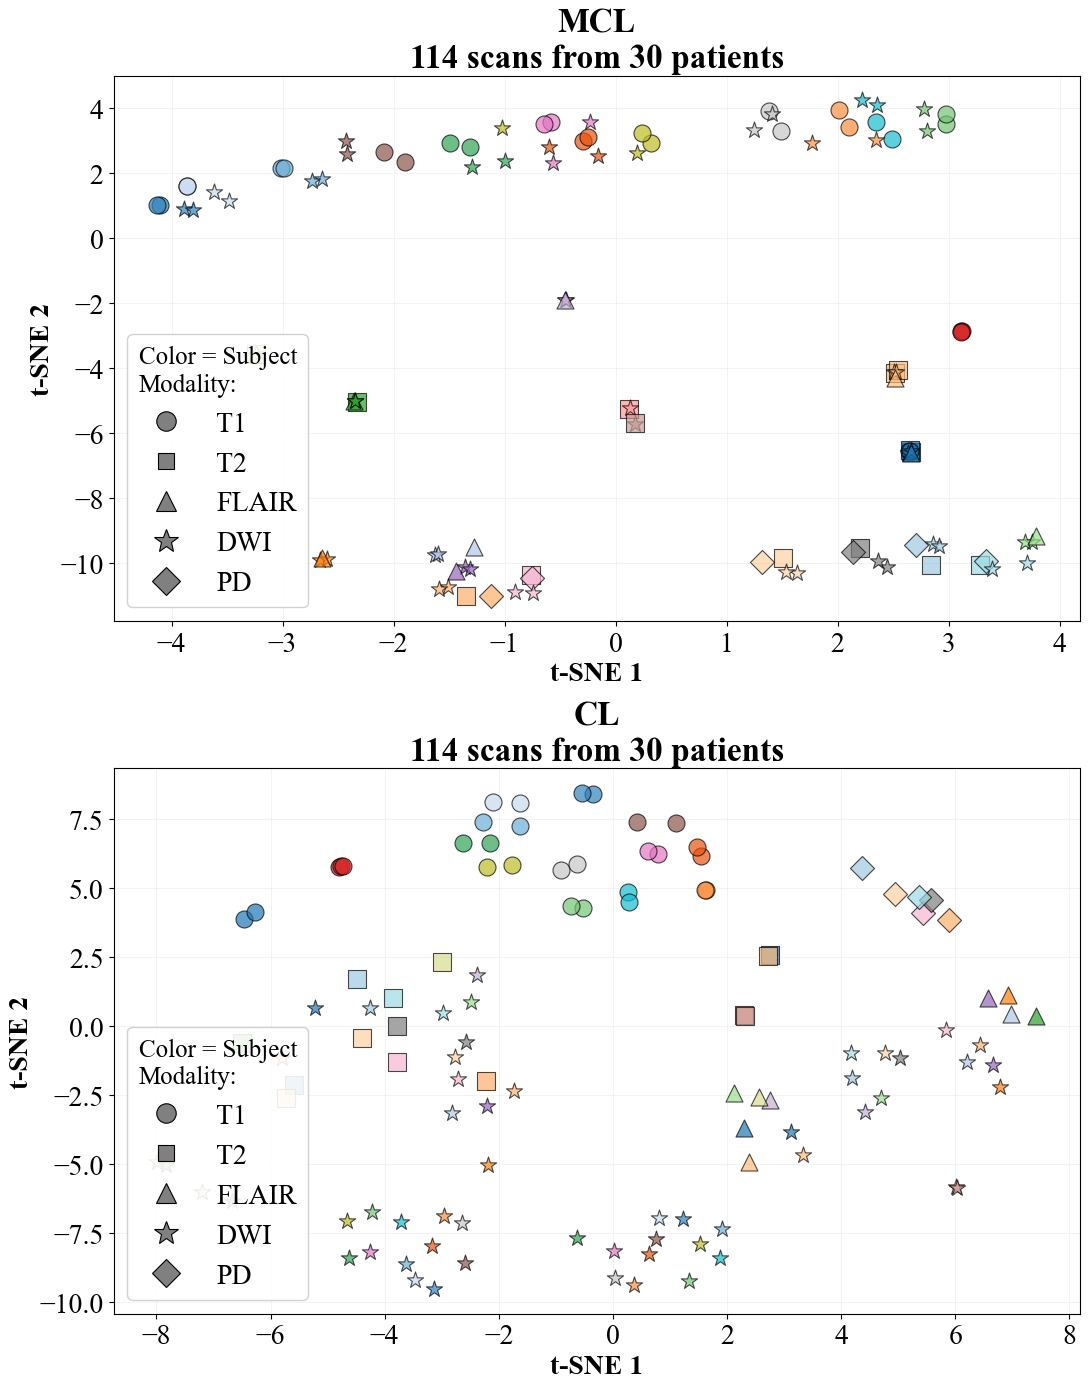

In [79]:
import torch
from pathlib import Path
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)


BASE_DIR = Path('/Users/P70090502/Documents/MRI_App/UMBRA/files')

checkpoint_names = ['mcl', 'cl', 'mae_mcl', 'mae_cl']
checkpoint_labels = {'mcl': 'MCL', 'cl': 'CL', 'mae_mcl': 'MAE + MCL', 'mae_cl': 'MAE + CL'}

embeddings_dict = {}
metadata_dict = {}

for name in checkpoint_names:
    checkpoint_dir = BASE_DIR / name
    embeddings_dict[name] = torch.load(checkpoint_dir / 'embeddings.pt')
    metadata_dict[name] = pd.read_csv(checkpoint_dir / 'metadata.csv')
    
    print(f'{checkpoint_labels[name]} (BEFORE deduplication):')
    print(f'  Shape: {embeddings_dict[name].shape}')
    print(f'  Patients: {metadata_dict[name]["patient_id"].nunique()}')
    print(f'  Modalities: {sorted(metadata_dict[name]["modality"].unique())}\n')
    
# Patient Clustering Analysis: MCL vs CL (2 rows)
# Color by patient, shape by modality
fig, axes = plt.subplots(2, 1, figsize=(11, 14))

# Select patients with most scans for better visualization
N_PATIENTS_TO_SHOW = 30

# Marker styles for each modality
modality_markers = {
    't1': 'o',       # circle
    't2': 's',       # square
    'flair': '^',    # triangle up
    'dwi': '*',      # star
    'pd': 'D'        # diamond
}

# Only MCL and CL
checkpoints_to_plot = ['mcl', 'cl']

for idx, checkpoint_name in enumerate(checkpoints_to_plot):
    print(f'Computing patient t-SNE for {checkpoint_labels[checkpoint_name]}...')
    
    embeddings = embeddings_dict[checkpoint_name].numpy()
    metadata = metadata_dict[checkpoint_name]
    
    # Select top N patients by number of scans
    patient_counts = metadata['patient_id'].value_counts()
    top_patients = patient_counts.head(N_PATIENTS_TO_SHOW).index.tolist()
    
    # Filter to these patients
    mask = metadata['patient_id'].isin(top_patients)
    embeddings_subset = embeddings[mask]
    metadata_subset = metadata[mask].reset_index(drop=True)

    dedup_mask = ~metadata_subset.duplicated(subset=['patient_id', 'filename'])
    embeddings_subset, metadata_subset = embeddings_subset[dedup_mask.values], metadata_subset[dedup_mask].reset_index(drop=True)
    
    # Run t-SNE with dynamic perplexity
    perplexity = min(30, max(5, len(embeddings_subset) - 1))
    print(f'  Using {len(embeddings_subset)} samples with perplexity={perplexity}')
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, max_iter=1000, verbose=0)
    embeddings_2d = tsne.fit_transform(embeddings_subset)
    
    # Plot with unique color per patient, shape per modality
    ax = axes[idx]
    
    # Use a colormap for patients - combine tab20 variants for 60 distinct colors
    cmap1 = plt.colormaps.get_cmap('tab20')
    cmap2 = plt.colormaps.get_cmap('tab20c')
    cmap3 = plt.colormaps.get_cmap('tab20b')
    colors = ([cmap1(i) for i in range(20)] + 
            [cmap2(i) for i in range(20)] + 
            [cmap3(i) for i in range(20)])
    patient_to_color = {patient: colors[i] for i, patient in enumerate(top_patients)}
    
    # Plot each patient's modalities with same color, different shapes
    for patient_id in top_patients:
        patient_mask = metadata_subset['patient_id'] == patient_id
        patient_data = metadata_subset[patient_mask]
        patient_coords = embeddings_2d[patient_mask]
        
        # Plot each modality for this patient
        for modality in patient_data['modality'].unique():
            modality_mask = patient_data['modality'] == modality
            mod_coords = patient_coords[modality_mask.values]
            
            if len(mod_coords) > 0:
                ax.scatter(
                    mod_coords[:, 0],
                    mod_coords[:, 1],
                    c=[patient_to_color[patient_id]],
                    marker=modality_markers[modality],
                    s=150,
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=0.8
                )
    
    # Simplified title - remove the training type description
    ax.set_title(
        f'{checkpoint_labels[checkpoint_name]}\n'
        f'{len(metadata_subset)} scans from {N_PATIENTS_TO_SHOW} patients',
        fontweight='bold',
        fontsize=24
    )
    ax.set_xlabel('t-SNE 1', fontweight='bold', fontsize=20)  # Increased from 14
    ax.set_ylabel('t-SNE 2', fontweight='bold', fontsize=20)  # Increased from 14
    ax.tick_params(axis='both', which='major', labelsize=20)  # Increased from 12
    ax.grid(True, alpha=0.2)
    
    # Create custom legend for modalities (shapes)
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
               markersize=14, label='T1', markeredgecolor='black', markeredgewidth=0.8),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', 
               markersize=12, label='T2', markeredgecolor='black', markeredgewidth=0.8),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', 
               markersize=14, label='FLAIR', markeredgecolor='black', markeredgewidth=0.8),
        Line2D([0], [0], marker='*', color='w', markerfacecolor='gray', 
               markersize=18, label='DWI', markeredgecolor='black', markeredgewidth=0.8),
        Line2D([0], [0], marker='D', color='w', markerfacecolor='gray', 
               markersize=14, label='PD', markeredgecolor='black', markeredgewidth=0.8),
    ]
    ax.legend(handles=legend_elements, loc='lower left', framealpha=0.9, 
             title='Color = Subject\nModality:', fontsize=20, title_fontsize=18)  # Increased from 18 and 12
    
plt.tight_layout()
plt.savefig(BASE_DIR / 'tsne_patient_clustering_mcl_vs_cl_with_modalities.pdf', dpi=60, bbox_inches='tight')
print(f'\nSaved: {BASE_DIR / "tsne_patient_clustering_mcl_vs_cl_with_modalities.pdf"}')
plt.show()